In [5]:
import rioxarray as rxr
import earthpy.plot as ep

# Acutally pretty good!

In [ ]:
with rxr.open_rasterio("LC08_L1TP_180035_20230726_20230804_02_T1_TOA_STACKED.tif") as ds:
    stack = ds

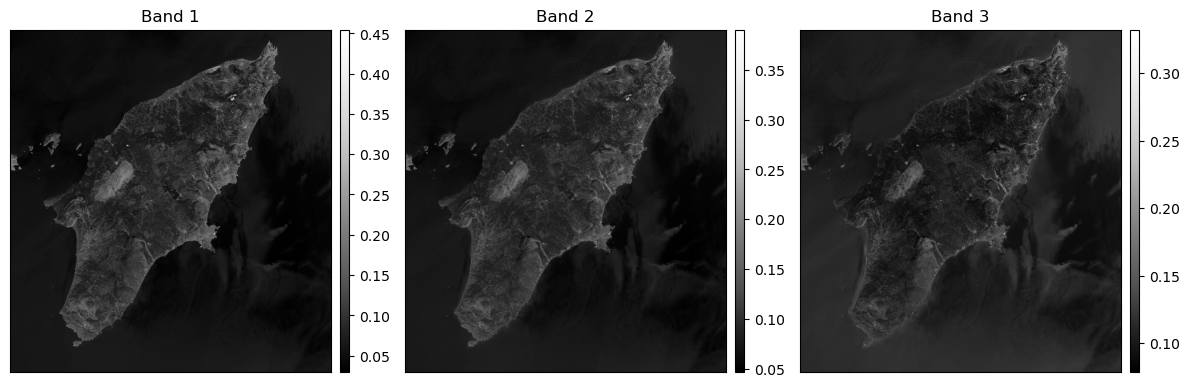

array([<Axes: title={'center': 'Band 1'}>,
       <Axes: title={'center': 'Band 2'}>,
       <Axes: title={'center': 'Band 3'}>], dtype=object)

In [7]:
# With multiband data, you access it like you would a numpy array
ep.plot_bands(stack[[3,2,1]])

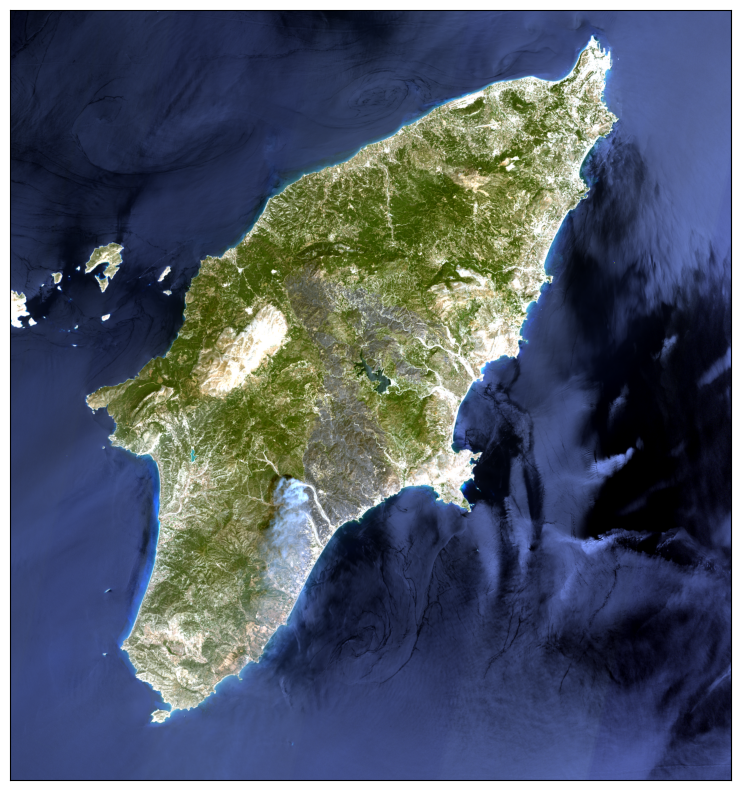

<Axes: >

In [13]:
# Note that when plotting RGB using plot_rgb, you need to feed it the data itself rather than the xarray
ep.plot_rgb(stack.data, rgb = (3,2,1), stretch = True)

In [14]:
# Doing operations still results in an rioxarray
ndvi = (stack[4] - stack[3]) / (stack[4] + stack[3])

ndvi

<xarray.DataArray (y: 2425, x: 2270)>
array([[-0.20453829, -0.2052346 , -0.1993671 , ..., -0.04527964,
        -0.0497302 , -0.05340096],
       [-0.19689922, -0.19731802, -0.1988813 , ..., -0.05104134,
        -0.05205001, -0.04707929],
       [-0.19646128, -0.19163334, -0.18932189, ..., -0.04622359,
        -0.04601878, -0.04556287],
       ...,
       [-0.07084704, -0.09137055, -0.0805276 , ..., -0.05899951,
        -0.06043485, -0.05798738],
       [-0.07927044, -0.08629077, -0.07510994, ..., -0.05990786,
        -0.06880271, -0.05089273],
       [-0.07343639, -0.07870372, -0.07706031, ..., -0.05619112,
        -0.06442576, -0.06857897]], dtype=float32)
Coordinates:
  * x            (x) float64 5.544e+05 5.544e+05 ... 6.224e+05 6.224e+05
  * y            (y) float64 4.038e+06 4.038e+06 ... 3.965e+06 3.965e+06
    spatial_ref  int32 0

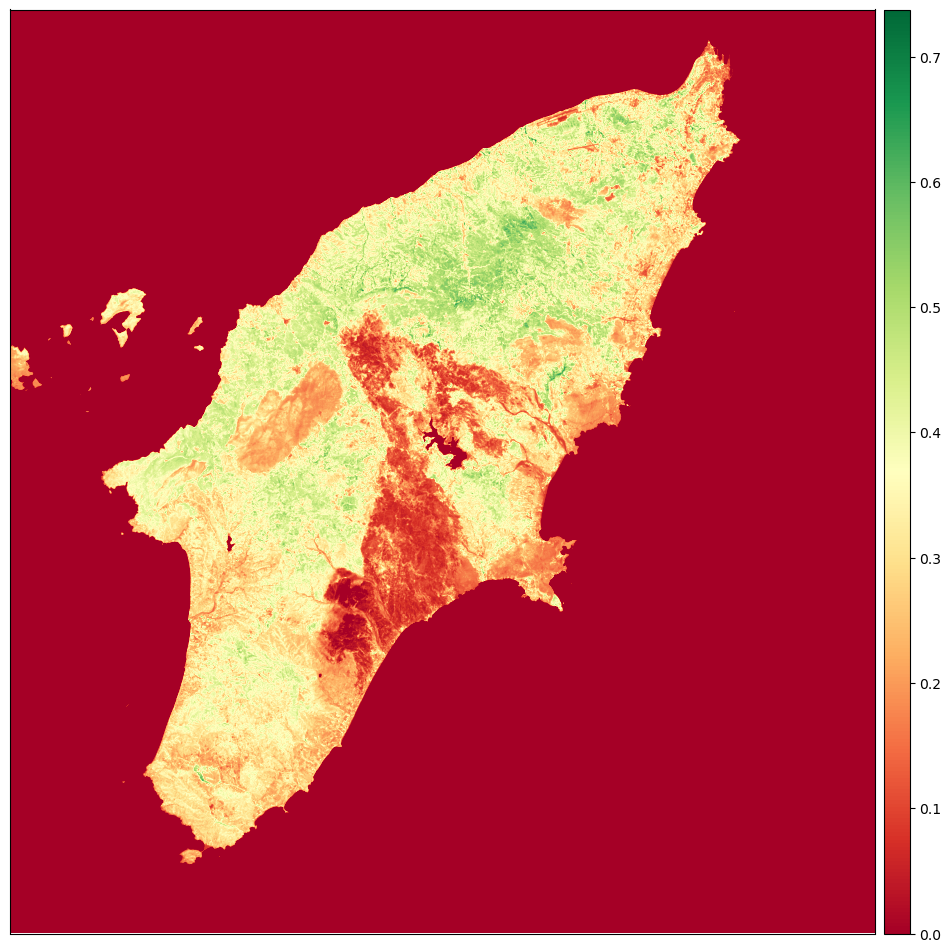

<Axes: >

In [17]:
ep.plot_bands(ndvi, cmap = "RdYlGn", vmin = 0)

In [20]:
# Try saving ndvi

# Looks like the count updates automatically! Very nice
ndvi.rio.to_raster("Rhodes NDVI.tif")

In [21]:
with rxr.open_rasterio("Rhodes NDVI.tif") as ds:
    ndvi = ds

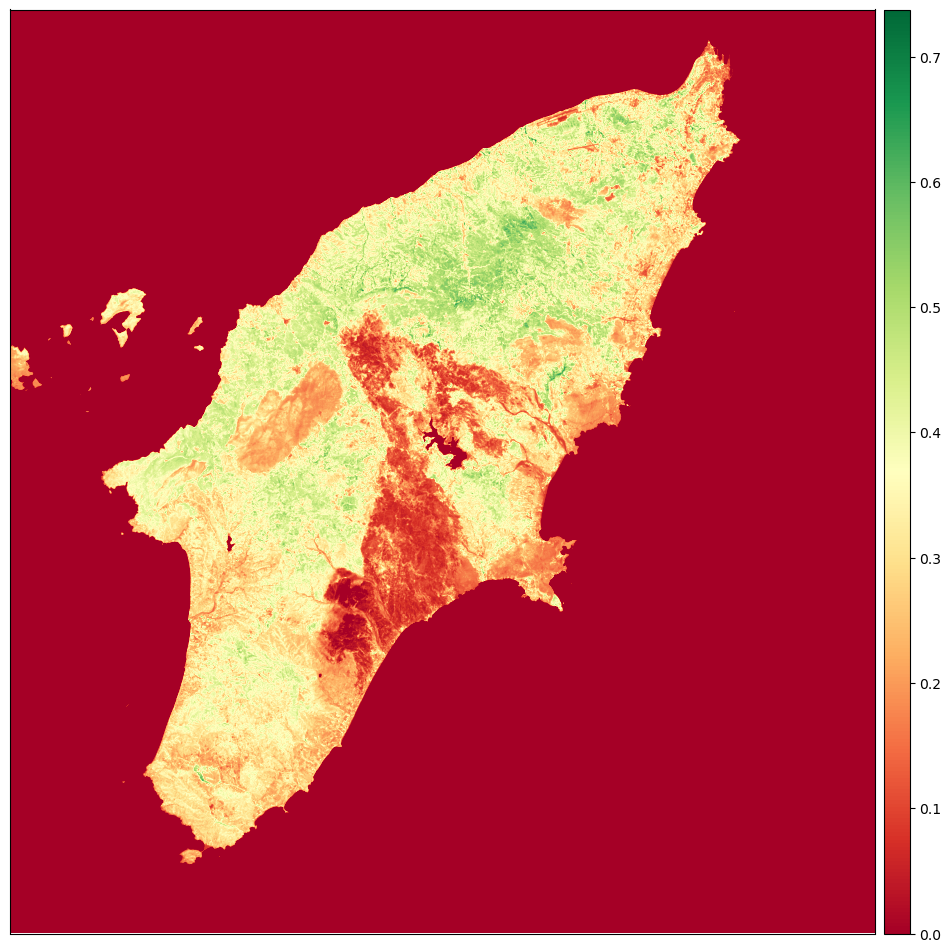

<Axes: >

In [23]:
ep.plot_bands(ndvi, cmap = "RdYlGn", vmin = 0)

In [25]:
ndvi.data

array([[[-0.20453829, -0.2052346 , -0.1993671 , ..., -0.04527964,
         -0.0497302 , -0.05340096],
        [-0.19689922, -0.19731802, -0.1988813 , ..., -0.05104134,
         -0.05205001, -0.04707929],
        [-0.19646128, -0.19163334, -0.18932189, ..., -0.04622359,
         -0.04601878, -0.04556287],
        ...,
        [-0.07084704, -0.09137055, -0.0805276 , ..., -0.05899951,
         -0.06043485, -0.05798738],
        [-0.07927044, -0.08629077, -0.07510994, ..., -0.05990786,
         -0.06880271, -0.05089273],
        [-0.07343639, -0.07870372, -0.07706031, ..., -0.05619112,
         -0.06442576, -0.06857897]]], dtype=float32)

In [ ]:
with rxr.open_rasterio("LC08_L1TP_180035_20230726_20230804_02_T1_TOA_STACKED.tif") as ds:
    stack = ds
    
# Doing operations still results in an rioxarray
ndvi = (stack[4] - stack[3]) / (stack[4] + stack[3])

# Looks like the count updates automatically! Very nice
ndvi.rio.to_raster("Rhodes NDVI.tif")

In [27]:
stack

<xarray.DataArray (band: 10, y: 2425, x: 2270)>
array([[[1.2322e-01, 1.2354e-01, ..., 1.4128e-01, 1.4110e-01],
        [1.2376e-01, 1.2334e-01, ..., 1.4176e-01, 1.4118e-01],
        ...,
        [1.3794e-01, 1.3714e-01, ..., 1.4084e-01, 1.4112e-01],
        [1.3798e-01, 1.3760e-01, ..., 1.4144e-01, 1.4120e-01]],

       [[9.6320e-02, 9.5660e-02, ..., 1.1880e-01, 1.1794e-01],
        [9.6600e-02, 9.5880e-02, ..., 1.1870e-01, 1.1780e-01],
        ...,
        [1.1354e-01, 1.1230e-01, ..., 1.1456e-01, 1.1620e-01],
        [1.1344e-01, 1.1272e-01, ..., 1.1576e-01, 1.1558e-01]],

       ...,

       [[2.7817e+04, 2.7838e+04, ..., 2.7920e+04, 2.7925e+04],
        [2.7825e+04, 2.7840e+04, ..., 2.7922e+04, 2.7926e+04],
        ...,
        [2.7724e+04, 2.7734e+04, ..., 0.0000e+00, 0.0000e+00],
        [2.7739e+04, 2.7752e+04, ..., 0.0000e+00, 0.0000e+00]],

       [[2.5917e+04, 2.5919e+04, ..., 2.6011e+04, 2.6011e+04],
        [2.5932e+04, 2.5937e+04, ..., 2.6019e+04, 2.6025e+04],
        ...,
        [2.5928e+04, 2.5929e+04, ..., 0.0000e+00, 0.0000e+00],
        [2.5928e+04, 2.5924e+04, ..., 0.0000e+00, 0.0000e+00]]], dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9 10
  * x            (x) float64 5.544e+05 5.544e+05 ... 6.224e+05 6.224e+05
  * y            (y) float64 4.038e+06 4.038e+06 ... 3.965e+06 3.965e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0